In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SQL Query by using Pandas library in Python

In [2]:
fileUpload = pd.read_csv('bank_data.csv')
fileUpload.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
fileUpload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  day         4521 non-null   int64 
 11  month       4521 non-null   object
 12  duration    4521 non-null   int64 
 13  campaign    4521 non-null   int64 
 14  pdays       4521 non-null   int64 
 15  previous    4521 non-null   int64 
 16  poutcome    4521 non-null   object
 17  y           4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [49]:
#1. Take 25% oldest people and calculate 2nd highest balance
oldest_df = fileUpload.sort_values('age', ascending=False).head(int(len(fileUpload) * 0.25))
second_highest_balance = oldest_df['balance'].nlargest(2).iloc[-1]
print(second_highest_balance)

27069


In [9]:
#2. use pandas to check how many people load house?
len(fileUpload.loc[fileUpload.month == 'oct'])

80

In [15]:
#3. create duration_length so that
#-duration < 0.3 avg(duration) --> duration_length=Short - 
#- duration>=0.3 avg(duration) && 
#duration<0.6 avg(duration)-->duration_length=Medium
#- duration>=0.6 avg(duration)-->duration_length=Long

avg_duration = fileUpload['duration'].mean()

def label_duration(row):
    if row < 0.3 * avg_duration:
        return 'Short'
    elif row >= 0.3 * avg_duration and row < 0.6 * avg_duration:
        return 'Medium'
    else:
        return 'Long'

fileUpload['duration_length'] = fileUpload['duration'].apply(label_duration)
fileUpload.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_length
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Short
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Long
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Long
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Long
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Long


In [21]:
#9. How many percent of each education level has housing=yes
fileSelect = fileUpload.loc[fileUpload.housing == 'yes'].education.value_counts()
dataT = fileUpload.education.value_counts()
(fileSelect/dataT)*100

education
secondary    62.012142
tertiary     49.111111
primary      56.489676
unknown      44.385027
Name: count, dtype: float64

In [22]:
#4.Count marial status of people and
#sum balance of each group
fileUpload.groupby('marital')['balance'].sum()

marital
divorced     592622
married     4092558
single      1746656
Name: balance, dtype: int64

In [26]:
#5. Create Age_group so that
#Age_group = Young if age < 30
#Age_group = Adult if age >= 30 && age < 60
#Age_group = Elderly if age >= 60.
fileUpload['age'].value_counts()
fileUpload['Age_group']=['']*fileUpload.shape[0]

for i in range(fileUpload.shape[0]):
    if fileUpload.loc[i,'age']<30:
        fileUpload.loc[i,'Age_group']='Young'
    elif fileUpload.loc[i,'age']>= 30 and fileUpload.loc[i, 'age'] < 60:
        fileUpload.loc[i,'Age_group']='Adult'
    else:
        fileUpload.loc[i,'Age_group']='Elderly'
fileUpload.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_length,Age_group
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Short,Adult
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Long,Adult
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Long,Adult
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Long,Adult
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Long,Adult


In [28]:
#10. Which job has the highest balance in the table?
find_max = fileUpload.groupby('job')['balance'].mean()
job_with_highest_balance = find_max.idxmax()
print('The job has the highest balance in the table is: ',job_with_highest_balance)

The job has the highest balance in the table is:  retired


In [35]:
#7. In what day of month the contact is the highest in Cellular
find_month = fileUpload[fileUpload['contact'] == 'cellular'].groupby('day').size()
max_day = find_month.idxmax()
print(max_day)

18


In [37]:
#6. In what month the Campain has the highest number?
find_max = fileUpload.groupby('month')['campaign'].count()
month_with_highest_campaign = find_max.idxmax()
print(f'The month with highest campaign is:{month_with_highest_campaign}')

The month with highest campaign is:may


In [48]:
#8. verify client who doesn't have any contact, how many percent of them has loan=yes
fileExceed = fileUpload.loc[fileUpload['loan'] == 'yes'].loan.value_counts()
ds = fileUpload.loan.value_counts()
fileExceed / ds

loan
no     NaN
yes    1.0
Name: count, dtype: float64

Machine Learning part:

In [50]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

<Axes: xlabel='balance', ylabel='Count'>

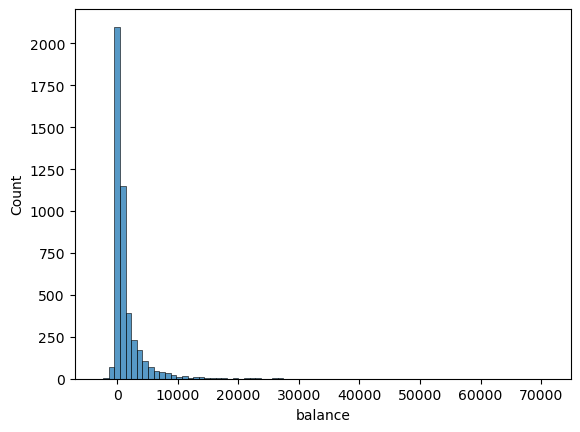

In [77]:
sns.histplot(fileUpload.balance,bins=80)

<Axes: xlabel='age', ylabel='balance'>

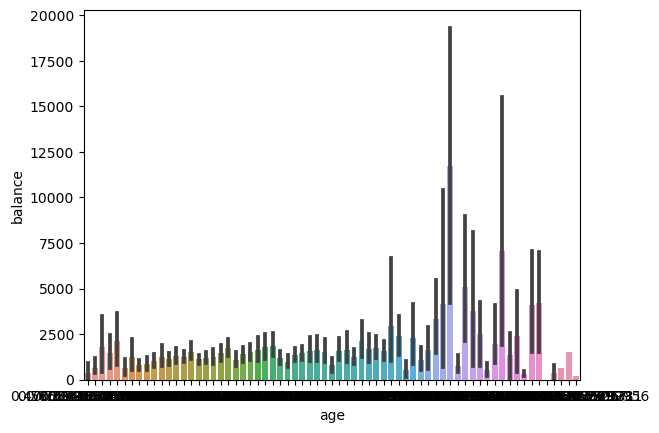

In [79]:
sns.barplot(x='age',y='balance',data=fileUpload)

<Axes: ylabel='balance'>

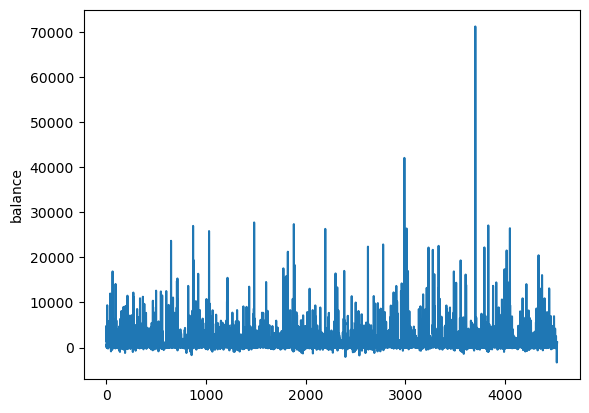

In [82]:
sns.lineplot(fileUpload.balance)

In [53]:
fileUpload.replace({'y':{'yes':1, 'no':0}}, inplace=True)
fileUpload.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_length,Age_group
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0,Short,Adult
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0,Long,Adult
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0,Long,Adult
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0,Long,Adult
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0,Long,Adult


In [65]:
fileUpload.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'duration_length',
       'Age_group'],
      dtype='object')

In [55]:
fileUpload.replace({'housing':{'yes':1, 'no':0}}, inplace=True)
fileUpload.replace({'loan':{'yes':1, 'no':0}}, inplace=True)
fileUpload.replace({'default':{'yes':1, 'no':0}}, inplace=True)
fileUpload.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_length,Age_group
0,0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,Short,Adult
1,1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,Long,Adult
2,2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,Long,Adult
3,3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,Long,Adult
4,4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,Long,Adult


In [57]:
import numpy as np
NORMALIZE_COLUMNS = ['age','housing','loan']
fileUpload[NORMALIZE_COLUMNS] = (fileUpload[NORMALIZE_COLUMNS] - np.mean(fileUpload[NORMALIZE_COLUMNS])) / np.std(fileUpload[NORMALIZE_COLUMNS])

Training Model

In [67]:
x = fileUpload.drop(['job', 'marital', 'education','housing','contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome','y','duration_length','Age_group'],axis=1)
y = fileUpload['y']
print(x)

      Unnamed: 0       age  default  balance       loan
0              0  1.516496        0     1787 -38.803817
1              1  1.800183        0     4789 -36.024769
2              2  1.989308        0     1350 -38.803817
3              3  1.516496        0     1476 -36.024769
4              4  4.258803        0        0 -38.803817
...          ...       ...      ...      ...        ...
4516        4516  1.800183        0     -333 -38.803817
4517        4517  4.069678        1    -3313 -36.024769
4518        4518  4.069678        0      295 -38.803817
4519        4519  1.327372        0     1137 -38.803817
4520        4520  2.840368        0     1136 -36.024769

[4521 rows x 5 columns]


In [68]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64


In [69]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=10)
print('Xtrain:',Xtrain.shape)
print('Ytrain:',Ytrain.shape)
print('Xtest:',Xtest.shape)
print('Ytest:',Ytest.shape)

Xtrain: (3616, 5)
Ytrain: (3616,)
Xtest: (905, 5)
Ytest: (905,)


In [70]:
model_t = RandomForestClassifier()

In [71]:
model_t.fit(Xtrain, Ytrain)
y_prediction = model_t.predict(Xtest)

In [74]:
# print(y_prediction)
accuracy = model_t.score(Xtest, y_prediction)
print('Accuracy:',accuracy*100)

Accuracy: 100.0
